##IMPORT LIBRARY##


In [117]:
# Impor semua libary yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from itertools import cycle
import io

In [118]:
# Mengunggah file data
print("Silakan unggah file CSV Anda...")
uploaded = files.upload()
file_name = next(iter(uploaded))
print(f"\nFile '{file_name}' berhasil diunggah dan akan diproses.")

Silakan unggah file CSV Anda...


Saving data_lengkap (3).csv to data_lengkap (3) (3).csv

File 'data_lengkap (3) (3).csv' berhasil diunggah dan akan diproses.


In [119]:
# Membaca data dari file yang diunggah
# Mencoba membaca dengan delimiter semicolon (;), jika gagal akan mencoba koma (,)
try:
    df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')
except Exception:
    df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')

# Mengganti koma dengan titik untuk desimal dan konversi ke tipe numerik
for col in ['Tinggi Badan (cm)', 'Berat Badan (kg)', 'HAZ', 'WAZ', 'WHZ']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)


# Menampilkan 5 baris pertama data untuk verifikasi
print("\nData berhasil dimuat. Berikut adalah 5 baris pertama:")
print(df.head())


Data berhasil dimuat. Berikut adalah 5 baris pertama:
  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)   HAZ  \
0     Laki-laki            19               91.6              13.3  3.03   
1     Laki-laki            20               77.7               8.5 -2.31   
2     Laki-laki            10               79.0              10.3  2.50   
3     Perempuan             2               50.3               8.3 -3.10   
4     Perempuan             5               56.4              10.9 -3.44   

    WAZ   WHZ          Stunting      Wasting  
0  1.59 -0.16            Normal       Normal  
1 -2.57 -2.23           Stunted  Underweight  
2  1.08 -0.07            Normal       Normal  
3  3.99  7.96  Severely Stunted        Obese  
4  3.69  7.25  Severely Stunted        Obese  


##EDA (Analisis Data Eksploratif)##


In [120]:
# Informasi umum dataset
print("=== Informasi Dataset ===")
print(df.info())

# Statistik deskriptif untuk variabel numerik
print("\n=== Statistik Deskriptif ===")
print(df.describe().T)  # T supaya lebih rapi (transposisi)

# Cek jumlah missing values
print("\n=== Jumlah Missing Values per Kolom ===")
print(df.isnull().sum())

# Cek jumlah data duplikat
print("\n=== Jumlah Data Duplikat ===")
print(df.duplicated().sum())

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99564 entries, 0 to 99563
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis Kelamin      99564 non-null  object 
 1   Umur (bulan)       99564 non-null  int64  
 2   Tinggi Badan (cm)  99564 non-null  float64
 3   Berat Badan (kg)   99564 non-null  float64
 4   HAZ                99564 non-null  float64
 5   WAZ                99564 non-null  float64
 6   WHZ                99564 non-null  float64
 7   Stunting           99564 non-null  object 
 8   Wasting            99564 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 6.8+ MB
None

=== Statistik Deskriptif ===
                     count       mean        std    min    25%    50%    75%  \
Umur (bulan)       99564.0  12.045097   7.171449   0.00   6.00  12.00  18.00   
Tinggi Badan (cm)  99564.0  73.262283  11.215137  44.30  65.60  74.20  81.50   
B

In [121]:
# Mengatur style visualisasi
sns.set_style("whitegrid")
print("\nMembuat visualisasi data...")

# --- Visualisasi 1 & 2: Komposisi Data
plt.figure(figsize=(20,10))
plt.suptitle('Grafik 1 & 2: Komposisi Data Dasar', fontsize=16, fontweight='bold')


Membuat visualisasi data...


Text(0.5, 0.98, 'Grafik 1 & 2: Komposisi Data Dasar')

<Figure size 2000x1000 with 0 Axes>

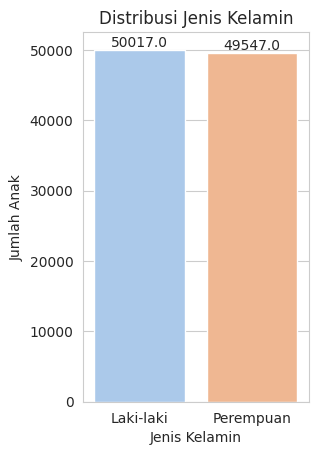

In [122]:
# Plot 1: Distribusi Jenis Kelamin
plt.subplot(1, 2, 1)
ax1 = sns.countplot(
    x='Jenis Kelamin', data=df,
    hue='Jenis Kelamin', palette='pastel',
    order=df['Jenis Kelamin'].value_counts().index,
    legend=False
)
plt.title('Distribusi Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Anak')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')


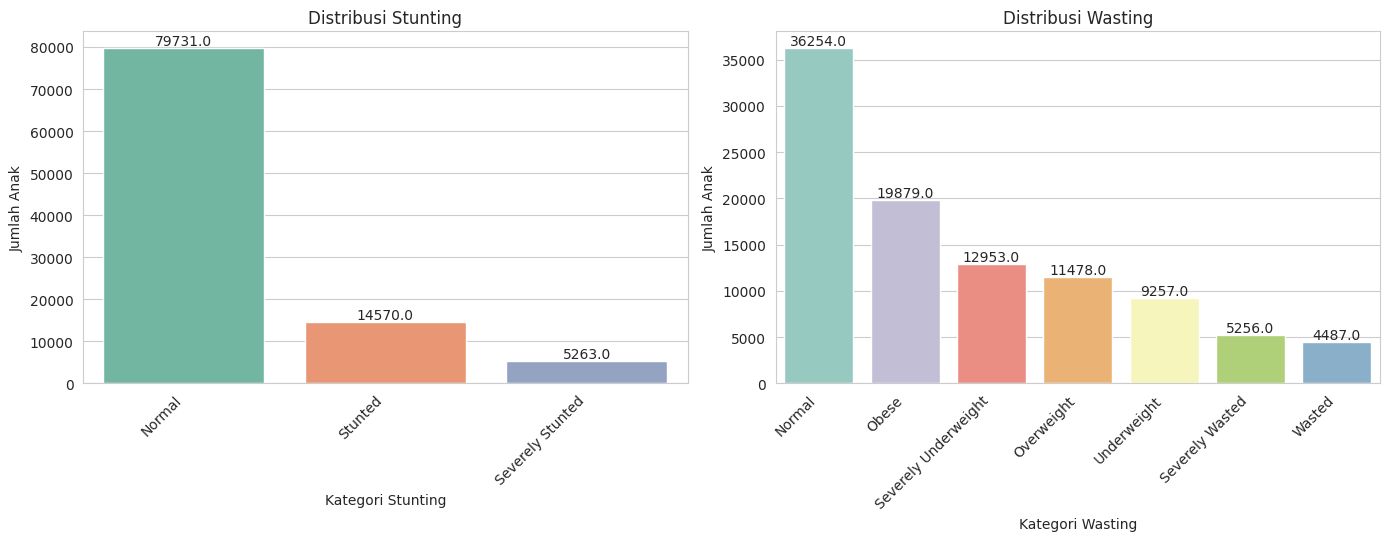

In [123]:
# Buat figure dengan 2 subplot
plt.figure(figsize=(14, 6))

# Plot 1: Distribusi Stunting
plt.subplot(1, 2, 1)
ax1 = sns.countplot(
    x='Stunting', data=df,
    hue='Stunting', palette='Set2',
    order=df['Stunting'].value_counts().index,
    legend=False
)
plt.title('Distribusi Stunting')
plt.xlabel('Kategori Stunting')
plt.ylabel('Jumlah Anak')
plt.xticks(rotation=45, ha='right')
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Plot 2: Distribusi Wasting
plt.subplot(1, 2, 2)
ax2 = sns.countplot(
    x='Wasting', data=df,
    hue='Wasting', palette='Set3',
    order=df['Wasting'].value_counts().index,
    legend=False
)
plt.title('Distribusi Wasting')
plt.xlabel('Kategori Wasting')
plt.ylabel('Jumlah Anak')
plt.xticks(rotation=45, ha='right')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Atur layout supaya rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


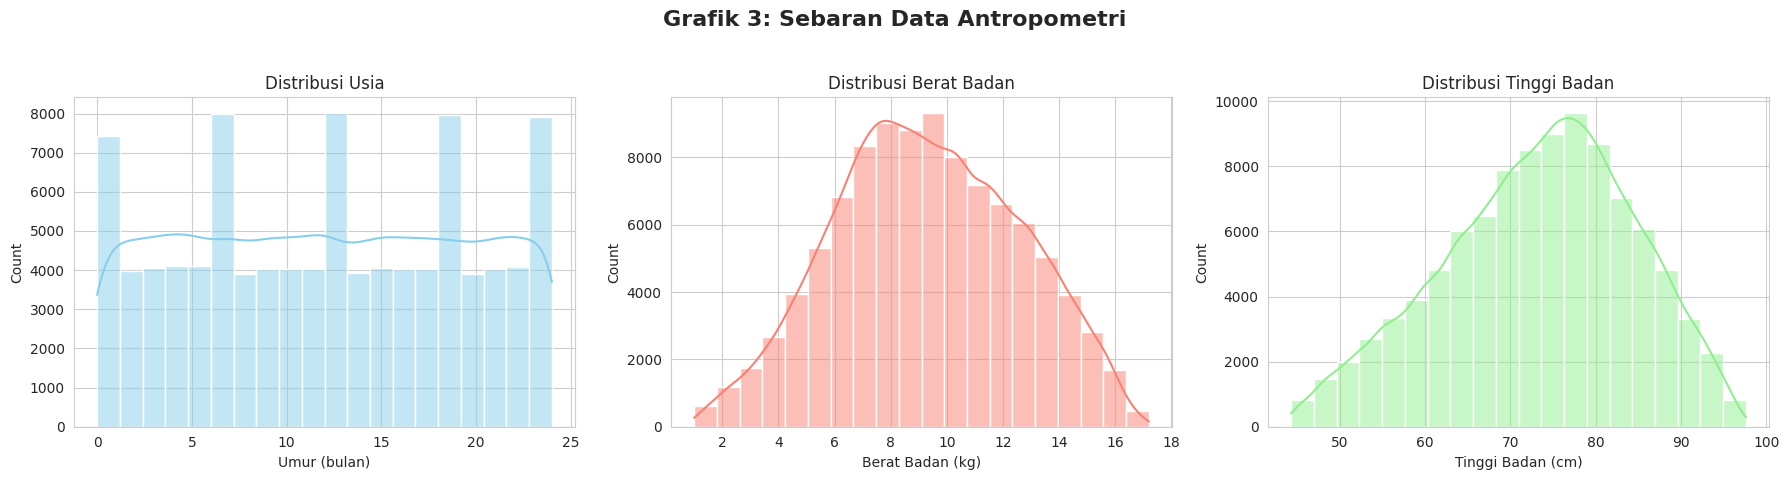

In [124]:
# Visualisasi 3: Sebaran Data Antropometri
plt.figure(figsize=(18, 5))
plt.suptitle('Grafik 3: Sebaran Data Antropometri', fontsize=16, fontweight='bold')

# Plot 3a: Distribusi Usia
plt.subplot(1, 3, 1)
sns.histplot(df['Umur (bulan)'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Usia')

# Plot 3b: Distribusi Berat Badan
plt.subplot(1, 3, 2)
sns.histplot(df['Berat Badan (kg)'], kde=True, bins=20, color='salmon')
plt.title('Distribusi Berat Badan')

# Plot 3c: Distribusi Tinggi Badan
plt.subplot(1, 3, 3)
sns.histplot(df['Tinggi Badan (cm)'], kde=True, bins=20, color='lightgreen')
plt.title('Distribusi Tinggi Badan')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

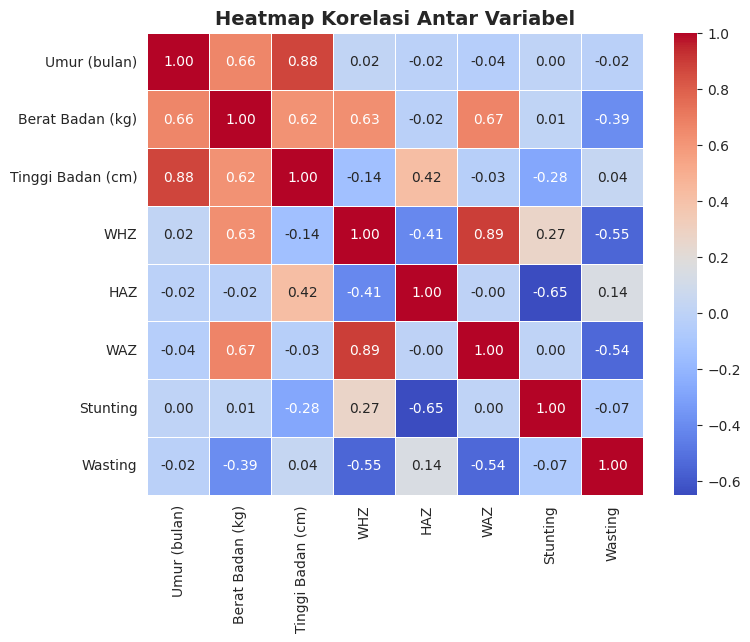

In [125]:
from sklearn.preprocessing import LabelEncoder

# Copy dataframe agar aman
df_corr = df.copy()

# Encode kolom kategorikal (Stunting & Wasting) ke numerik
le = LabelEncoder()
for col in ['Stunting', 'Wasting']:
    df_corr[col] = le.fit_transform(df_corr[col])

# Pilih hanya kolom yang relevan (tanpa Z-score)
selected_cols = ['Umur (bulan)', 'Berat Badan (kg)', 'Tinggi Badan (cm)','WHZ','HAZ','WAZ', 'Stunting', 'Wasting']
corr = df_corr[selected_cols].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14, fontweight="bold")
plt.show()


## PREPROCESSING DATA ##

In [126]:
print("Mengecek Data Duplikat")

# Hapus kolom turunan (Risiko Malnutrisi) agar tidak ikut preprocessing
if "Risiko Malnutrisi" in df.columns:
    df.drop(columns=["Risiko Malnutrisi"], inplace=True)
    print("Kolom 'Risiko Malnutrisi' dihapus dari dataset.")

# Mengecek jumlah data duplikat
jumlah_duplikat = df.duplicated().sum()

if jumlah_duplikat == 0:
    print("Hasil: Tidak ditemukan baris data yang duplikat.")
else:
    print(f"Hasil: Ditemukan {jumlah_duplikat} baris data duplikat.")

    # Tampilkan baris duplikat
    print("\nMenampilkan data yang terlibat dalam duplikasi:")
    print(df[df.duplicated(keep=False)])

    # Hapus duplikat
    df.drop_duplicates(inplace=True, ignore_index=True)
    print(f"\nData duplikat berhasil dihapus. Jumlah data sekarang: {len(df)} baris.")

print("-" * 50)


Mengecek Data Duplikat
Hasil: Ditemukan 7242 baris data duplikat.

Menampilkan data yang terlibat dalam duplikasi:
      Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)   HAZ  \
17        Perempuan             3               61.2               9.0  0.66   
24        Laki-laki             7               72.6              10.7  1.58   
33        Laki-laki            19               84.4              13.0  0.42   
41        Perempuan            12               80.3               5.4  2.44   
51        Laki-laki            16               84.2               9.6  1.54   
...             ...           ...                ...               ...   ...   
99542     Laki-laki             3               61.8               5.4  0.18   
99553     Perempuan            20               86.1              12.3  1.13   
99556     Perempuan            23               94.0              15.8  2.67   
99562     Laki-laki             7               73.6               5.5  2.04   
99563

In [127]:
print("\nIdentifikasi & Penanganan Nilai Hilang")

# Cek nilai kosong sebelum ditangani
print("\nJumlah data kosong SEBELUM ditangani:")
print(df.isnull().sum())

# Isi missing values
print("\nMelakukan proses pengisian (imputation)...")

# Umur (median)
if df['Umur (bulan)'].isnull().sum() > 0:
    median_usia = df['Umur (bulan)'].median()
    df['Umur (bulan)'].fillna(median_usia, inplace=True)
    print(f"-> Data kosong di 'Umur (bulan)' diisi dengan median: {median_usia}")

# Berat badan (mean)
if df['Berat Badan (kg)'].isnull().sum() > 0:
    mean_berat = df['Berat Badan (kg)'].mean()
    df['Berat Badan (kg)'].fillna(mean_berat, inplace=True)
    print(f"-> Data kosong di 'Berat Badan (kg)' diisi dengan mean: {mean_berat:.2f}")

# Tinggi badan (median)
if df['Tinggi Badan (cm)'].isnull().sum() > 0:
    median_tinggi = df['Tinggi Badan (cm)'].median()
    df['Tinggi Badan (cm)'].fillna(median_tinggi, inplace=True)
    print(f"-> Data kosong di 'Tinggi Badan (cm)' diisi dengan median: {median_tinggi}")

# Verifikasi setelah penanganan
print("\nVerifikasi Setelah Penanganan")
print("Jumlah data kosong SETELAH ditangani:")
print(df.isnull().sum())

print("\nProses pembersihan data selesai.")
print("\nContoh 10 baris pertama dari data yang sudah bersih:")
print(df.head(10))



Identifikasi & Penanganan Nilai Hilang

Jumlah data kosong SEBELUM ditangani:
Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
HAZ                  0
WAZ                  0
WHZ                  0
Stunting             0
Wasting              0
dtype: int64

Melakukan proses pengisian (imputation)...

Verifikasi Setelah Penanganan
Jumlah data kosong SETELAH ditangani:
Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
HAZ                  0
WAZ                  0
WHZ                  0
Stunting             0
Wasting              0
dtype: int64

Proses pembersihan data selesai.

Contoh 10 baris pertama dari data yang sudah bersih:
  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)   HAZ  \
0     Laki-laki            19               91.6              13.3  3.03   
1     Laki-laki            20               77.7               8.5 -2.31   
2     Laki-laki            10               79.0    

In [128]:
# Membuat kolom Risiko Malnutrisi berdasarkan kombinasi Stunting & Wasting
def klasifikasi_risiko(row):
    stunting = row["Stunting"]
    wasting = row["Wasting"]

    if stunting == "Severely Stunted" or wasting in ["Severely Wasted", "Severely Underweight"]:
        return "Risiko Sangat Tinggi"
    elif stunting == "Stunted" or wasting in ["Wasted", "Obese"]:
        return "Risiko Tinggi"
    elif wasting in ["Overweight", "Underweight"]:
        return "Risiko Sedang"
    elif stunting == "Normal" and wasting == "Normal":
        return "Risiko Rendah"
    else:
        return None

# Terapkan fungsi ke DataFrame
df["Risiko Malnutrisi"] = df.apply(klasifikasi_risiko, axis=1)

print("\nCek hasil mapping Risiko Malnutrisi:")
print(df[["Stunting", "Wasting", "Risiko Malnutrisi"]].head(10))



Cek hasil mapping Risiko Malnutrisi:
           Stunting               Wasting     Risiko Malnutrisi
0            Normal                Normal         Risiko Rendah
1           Stunted           Underweight         Risiko Tinggi
2            Normal                Normal         Risiko Rendah
3  Severely Stunted                 Obese  Risiko Sangat Tinggi
4  Severely Stunted                 Obese  Risiko Sangat Tinggi
5            Normal  Severely Underweight  Risiko Sangat Tinggi
6            Normal                Normal         Risiko Rendah
7            Normal  Severely Underweight  Risiko Sangat Tinggi
8            Normal                 Obese         Risiko Tinggi
9            Normal                Normal         Risiko Rendah


In [129]:
features = ['Umur (bulan)', 'Jenis Kelamin', 'Berat Badan (kg)', 'Tinggi Badan (cm)', 'Stunting', 'Wasting']
target = 'Risiko Malnutrisi'

# 1) Ambil kolom yang diperlukan
df_model = df[features + [target]].copy()

# 2) Pastikan kolom numerik benar
for col in ['Umur (bulan)', 'Berat Badan (kg)', 'Tinggi Badan (cm)']:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# 3) Drop baris yang memiliki NaN pada fitur atau target (sinkron)
df_model = df_model.dropna(subset=features + [target]).reset_index(drop=True)

# 4) Buat dan pakai LabelEncoders
le_gender = LabelEncoder()
le_stunting = LabelEncoder()
le_wasting = LabelEncoder()
le_target = LabelEncoder()

df_model['Jenis Kelamin'] = le_gender.fit_transform(df_model['Jenis Kelamin'])
df_model['Stunting'] = le_stunting.fit_transform(df_model['Stunting'])
df_model['Wasting'] = le_wasting.fit_transform(df_model['Wasting'])
y_encoded = le_target.fit_transform(df_model[target])

# 5) Siapkan X dan y akhir (sudah sinkron)
X = df_model[features].copy()
y = y_encoded

# 6) Tampilkan mapping (benar reference ke encoder yang tepat)
print("Mapping Jenis Kelamin:")
for i, kelas in enumerate(le_gender.classes_):
    print(f"{kelas} -> {i}")

print("\nMapping Stunting:")
for i, kelas in enumerate(le_stunting.classes_):
    print(f"{kelas} -> {i}")

print("\nMapping Wasting:")
for i, kelas in enumerate(le_wasting.classes_):
    print(f"{kelas} -> {i}")

print("\nMapping Risiko Malnutrisi (target):")
for i, kelas in enumerate(le_target.classes_):
    print(f"{kelas} -> {i}")

print("\nContoh data setelah encoding:")
print(X.head())

print("\nContoh target setelah encoding:")
print(y[:10])

print("\n✅ Data sudah siap untuk dilatih.")

Mapping Jenis Kelamin:
Laki-laki -> 0
Perempuan -> 1

Mapping Stunting:
Normal -> 0
Severely Stunted -> 1
Stunted -> 2

Mapping Wasting:
Normal -> 0
Obese -> 1
Overweight -> 2
Severely Underweight -> 3
Severely Wasted -> 4
Underweight -> 5
Wasted -> 6

Mapping Risiko Malnutrisi (target):
Risiko Rendah -> 0
Risiko Sangat Tinggi -> 1
Risiko Sedang -> 2
Risiko Tinggi -> 3

Contoh data setelah encoding:
   Umur (bulan)  Jenis Kelamin  Berat Badan (kg)  Tinggi Badan (cm)  Stunting  \
0            19              0              13.3               91.6         0   
1            20              0               8.5               77.7         2   
2            10              0              10.3               79.0         0   
3             2              1               8.3               50.3         1   
4             5              1              10.9               56.4         1   

   Wasting  
0        0  
1        5  
2        0  
3        1  
4        1  

Contoh target setelah encoding:

In [130]:
# Persiapkan semua data target terlebih dahulu
y_encoded = y
n_classes = len(np.unique(y_encoded))
y_binarized = label_binarize(y_encoded, classes=range(n_classes))

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.3,       # 20% data untuk testing
    random_state=42,     # agar hasil split selalu sama
    stratify=y_encoded   # menjaga proporsi kelas tetap seimbang
)

# Tampilkan ukuran data
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])
print("Jumlah fitur        :", X_train.shape[1])
print(f"Data dibagi menjadi {len(X_train)} data latih dan {len(X_test)} data uji.")

Jumlah data training: 64625
Jumlah data testing : 27697
Jumlah fitur        : 6
Data dibagi menjadi 64625 data latih dan 27697 data uji.


## MODELLING ##

In [131]:
# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi data training & testing
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Ubah hasil ke label string
y_train_labels = le_target.inverse_transform(y_train_pred)
y_test_labels = le_target.inverse_transform(y_test_pred)

# Hitung akurasi training & testing
train_acc = accuracy_score(y_train, y_train_pred) * 100
test_acc = accuracy_score(y_test, y_test_pred) * 100

# Hitung akurasi keseluruhan (gabungan train + test)
y_all_true = np.concatenate([y_train, y_test])
y_all_pred = np.concatenate([y_train_pred, y_test_pred])
overall_acc = accuracy_score(y_all_true, y_all_pred) * 100

print("Decision Tree Berhasil Dilatih")
print(f"Akurasi Model (Training)   : {train_acc:.2f}%")
print(f"Akurasi Model (Testing)    : {test_acc:.2f}%")
print(f"Akurasi Model (Keseluruhan): {overall_acc:.2f}%")


Decision Tree Berhasil Dilatih
Akurasi Model (Training)   : 98.16%
Akurasi Model (Testing)    : 98.22%
Akurasi Model (Keseluruhan): 98.18%


In [132]:
# ===== Classification Report =====
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred, target_names=le_target.classes_))


Classification Report (Testing Data):
                      precision    recall  f1-score   support

       Risiko Rendah       1.00      1.00      1.00      8769
Risiko Sangat Tinggi       1.00      0.98      0.99      6312
       Risiko Sedang       0.90      1.00      0.95      4657
       Risiko Tinggi       1.00      0.95      0.98      7959

            accuracy                           0.98     27697
           macro avg       0.98      0.98      0.98     27697
        weighted avg       0.98      0.98      0.98     27697



In [133]:
model_to_validate = DecisionTreeClassifier(max_depth=5, random_state=42)

# Menjalankan fungsi cross_val_score
# cv=5 berarti data dibagi menjadi 5 lipatan (folds)
scores = cross_val_score(estimator=model_to_validate, X=X, y=y_encoded, cv=5, scoring='accuracy')

# Menampilkan Hasil Cross-Validation
print("\n=== HASIL CROSS-VALIDATION ===")
print(f"Skor Akurasi untuk setiap Fold (5-Fold CV): \n{np.round(scores, 3)}")
print("-" * 40)
print(f"Akurasi Rata-rata : {scores.mean() * 100:.2f}%")
print(f"Standar Deviasi   : {scores.std() * 100:.2f}%")
print("\nProses validasi selesai.")


=== HASIL CROSS-VALIDATION ===
Skor Akurasi untuk setiap Fold (5-Fold CV): 
[0.983 0.981 0.983 0.981 0.981]
----------------------------------------
Akurasi Rata-rata : 98.18%
Standar Deviasi   : 0.11%

Proses validasi selesai.


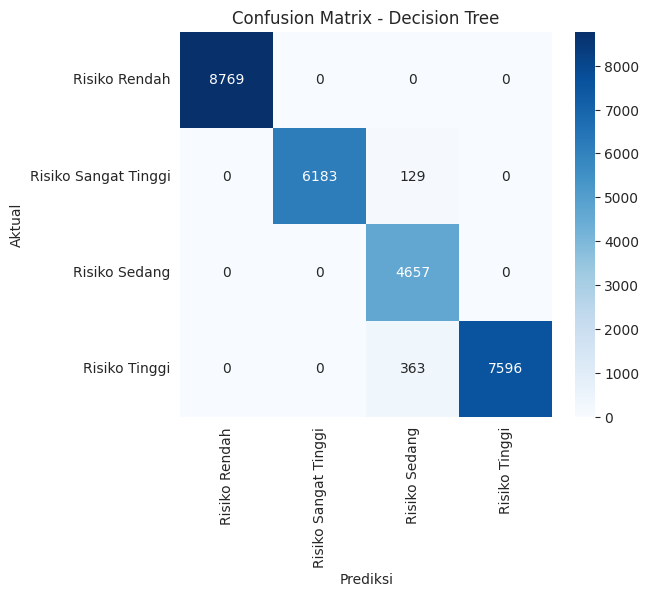

In [134]:
# ===== Confusion Matrix =====
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


=== Hasil AUC per Kelas ===
Kelas Risiko Rendah : 1.000
Kelas Risiko Sangat Tinggi : 0.999
Kelas Risiko Sedang : 0.995
Kelas Risiko Tinggi : 0.997

Skor Macro-Averaged AUC (One-vs-Rest): 0.998


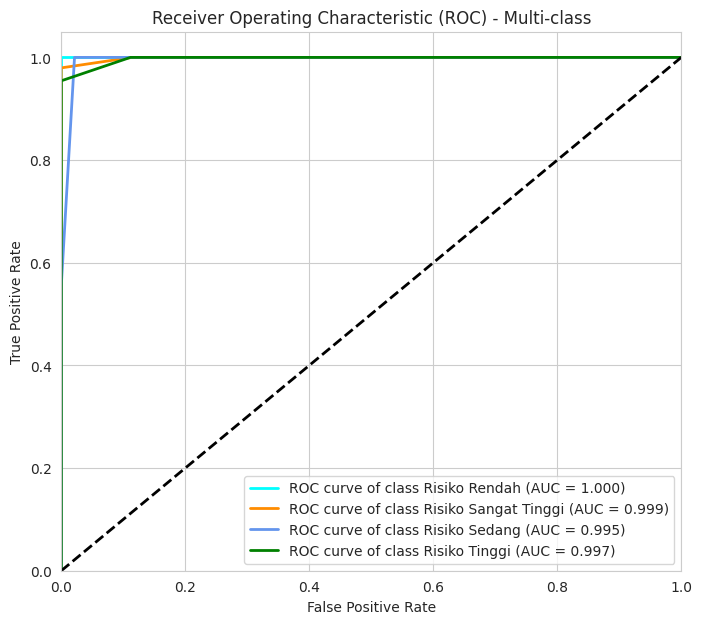

In [135]:
# ===== ROC-AUC (Multi-class) =====
if hasattr(dt_model, "predict_proba"):
    y_test_proba = dt_model.predict_proba(X_test)

    # Binarize y_test untuk perhitungan ROC
    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_test_binarized.shape[1]

    # Hitung kurva ROC dan nilai AUC (Area Under Curve) untuk setiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_test_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Hitung Macro-Averaged AUC
    macro_auc = roc_auc_score(y_test_binarized, y_test_proba, average="macro")

    # Print hasil AUC tiap kelas
    print("\n=== Hasil AUC per Kelas ===")
    for i in range(n_classes):
        print(f"Kelas {le_target.classes_[i]} : {roc_auc[i]:.3f}")

    print(f"\nSkor Macro-Averaged AUC (One-vs-Rest): {macro_auc:.3f}")

    # Plot semua kurva ROC
    plt.figure(figsize=(8, 7))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (AUC = {1:0.3f})'
                 ''.format(le_target.classes_[i], roc_auc[i]))

    # Tambahkan garis baseline
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Multi-class')
    plt.legend(loc="lower right")
    plt.show()

else:
    print("\nModel does not support predict_proba, cannot compute ROC-AUC for multi-class.")


## VISUALISASI ##

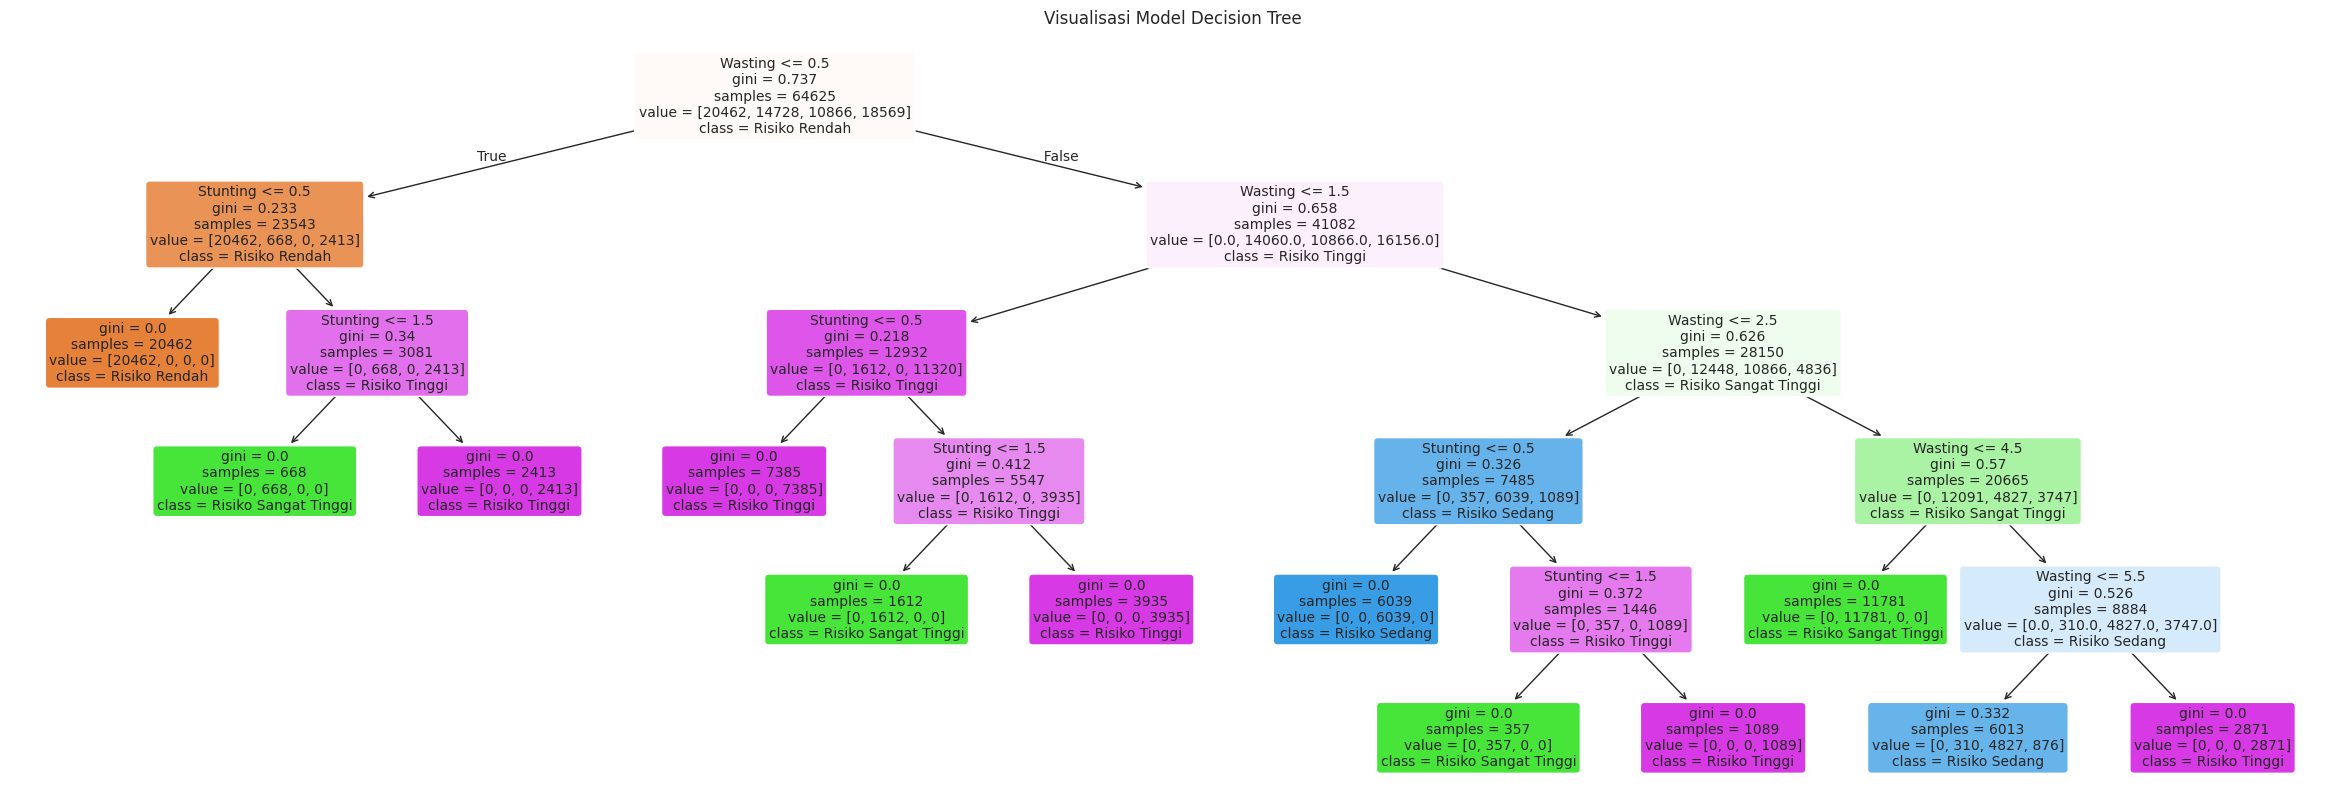

In [136]:
# Memvisualisasikan Pohon Keputusan
plt.figure(figsize=(30,10))
plot_tree(dt_model,
          feature_names=features,
          class_names=le_target.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualisasi Model Decision Tree")
plt.show()

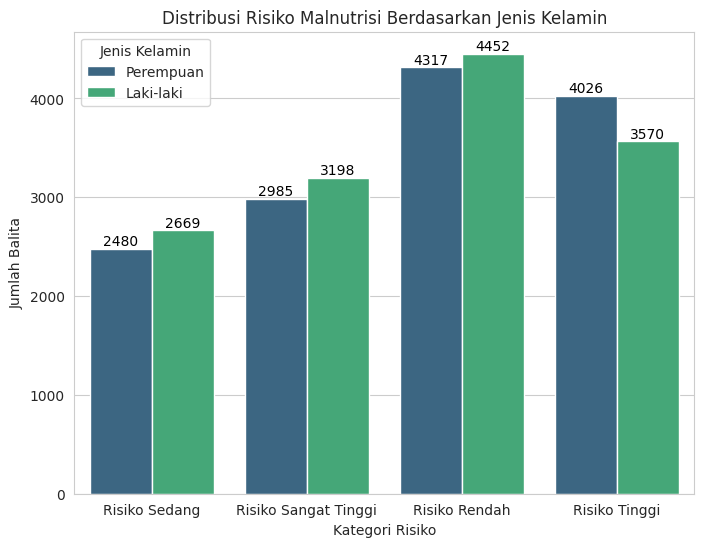

In [137]:
X_test["Risiko Malnutrisi"] = le_target.inverse_transform(y_pred)
X_test["Jenis_Kelamin"] = df.loc[X_test.index, "Jenis Kelamin"]

plt.figure(figsize=(8,6))
ax = sns.countplot(x="Risiko Malnutrisi", hue="Jenis_Kelamin", data=X_test, palette="viridis")

# Tambahkan angka di atas bar
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.title("Distribusi Risiko Malnutrisi Berdasarkan Jenis Kelamin")
plt.xlabel("Kategori Risiko")
plt.ylabel("Jumlah Balita")
plt.legend(title="Jenis Kelamin")
plt.show()

In [138]:
data_baru = [[21, 'Laki-laki', 23.5, 90.0, 'Stunted', 'Overweight']]
data_baru_df = pd.DataFrame(data_baru, columns=['Umur (bulan)', 'Jenis Kelamin', 'Berat Badan (kg)', 'Tinggi Badan (cm)', 'Stunting', 'Wasting'])

data_baru_df['Jenis Kelamin'] = le_gender.transform(data_baru_df['Jenis Kelamin'])
data_baru_df['Stunting'] = le_stunting.transform(data_baru_df['Stunting'])
data_baru_df['Wasting'] = le_wasting.transform(data_baru_df['Wasting'])

data_baru_df = data_baru_df[features]


# Lakukan prediksi menggunakan model yang sudah dilatih
prediksi_encoded = dt_model.predict(data_baru_df)

# Ubah hasil prediksi dari label encoded kembali ke label asli menggunakan inverse_transform
prediksi_label = le_target.inverse_transform(prediksi_encoded)

print("Data baru untuk prediksi:")
print(data_baru_df)
print("\nHasil prediksi risiko malnutrisi:", prediksi_label[0]) # Akses elemen pertama karena prediksi menghasilkan array

Data baru untuk prediksi:
   Umur (bulan)  Jenis Kelamin  Berat Badan (kg)  Tinggi Badan (cm)  Stunting  \
0            21              0              23.5               90.0         2   

   Wasting  
0        2  

Hasil prediksi risiko malnutrisi: Risiko Tinggi
